<a href="https://colab.research.google.com/github/Shivamtripathi13/Predicting-the-Price-of-a-Football-Player-/blob/main/Predicting_the_Price_of_a_Football_Player_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("football_CLEAN.csv", header=0)
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [ ]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.997831,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.961202,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
data.shape

(461, 17)

In [ ]:
data['market_value'].max()

75.0

In [ ]:
data.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [ ]:
data=data.fillna(method='pad')
data.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [ ]:
#duplicate values
dup=data.duplicated()
print(dup.sum())

0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    int64  
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 61.4+ KB


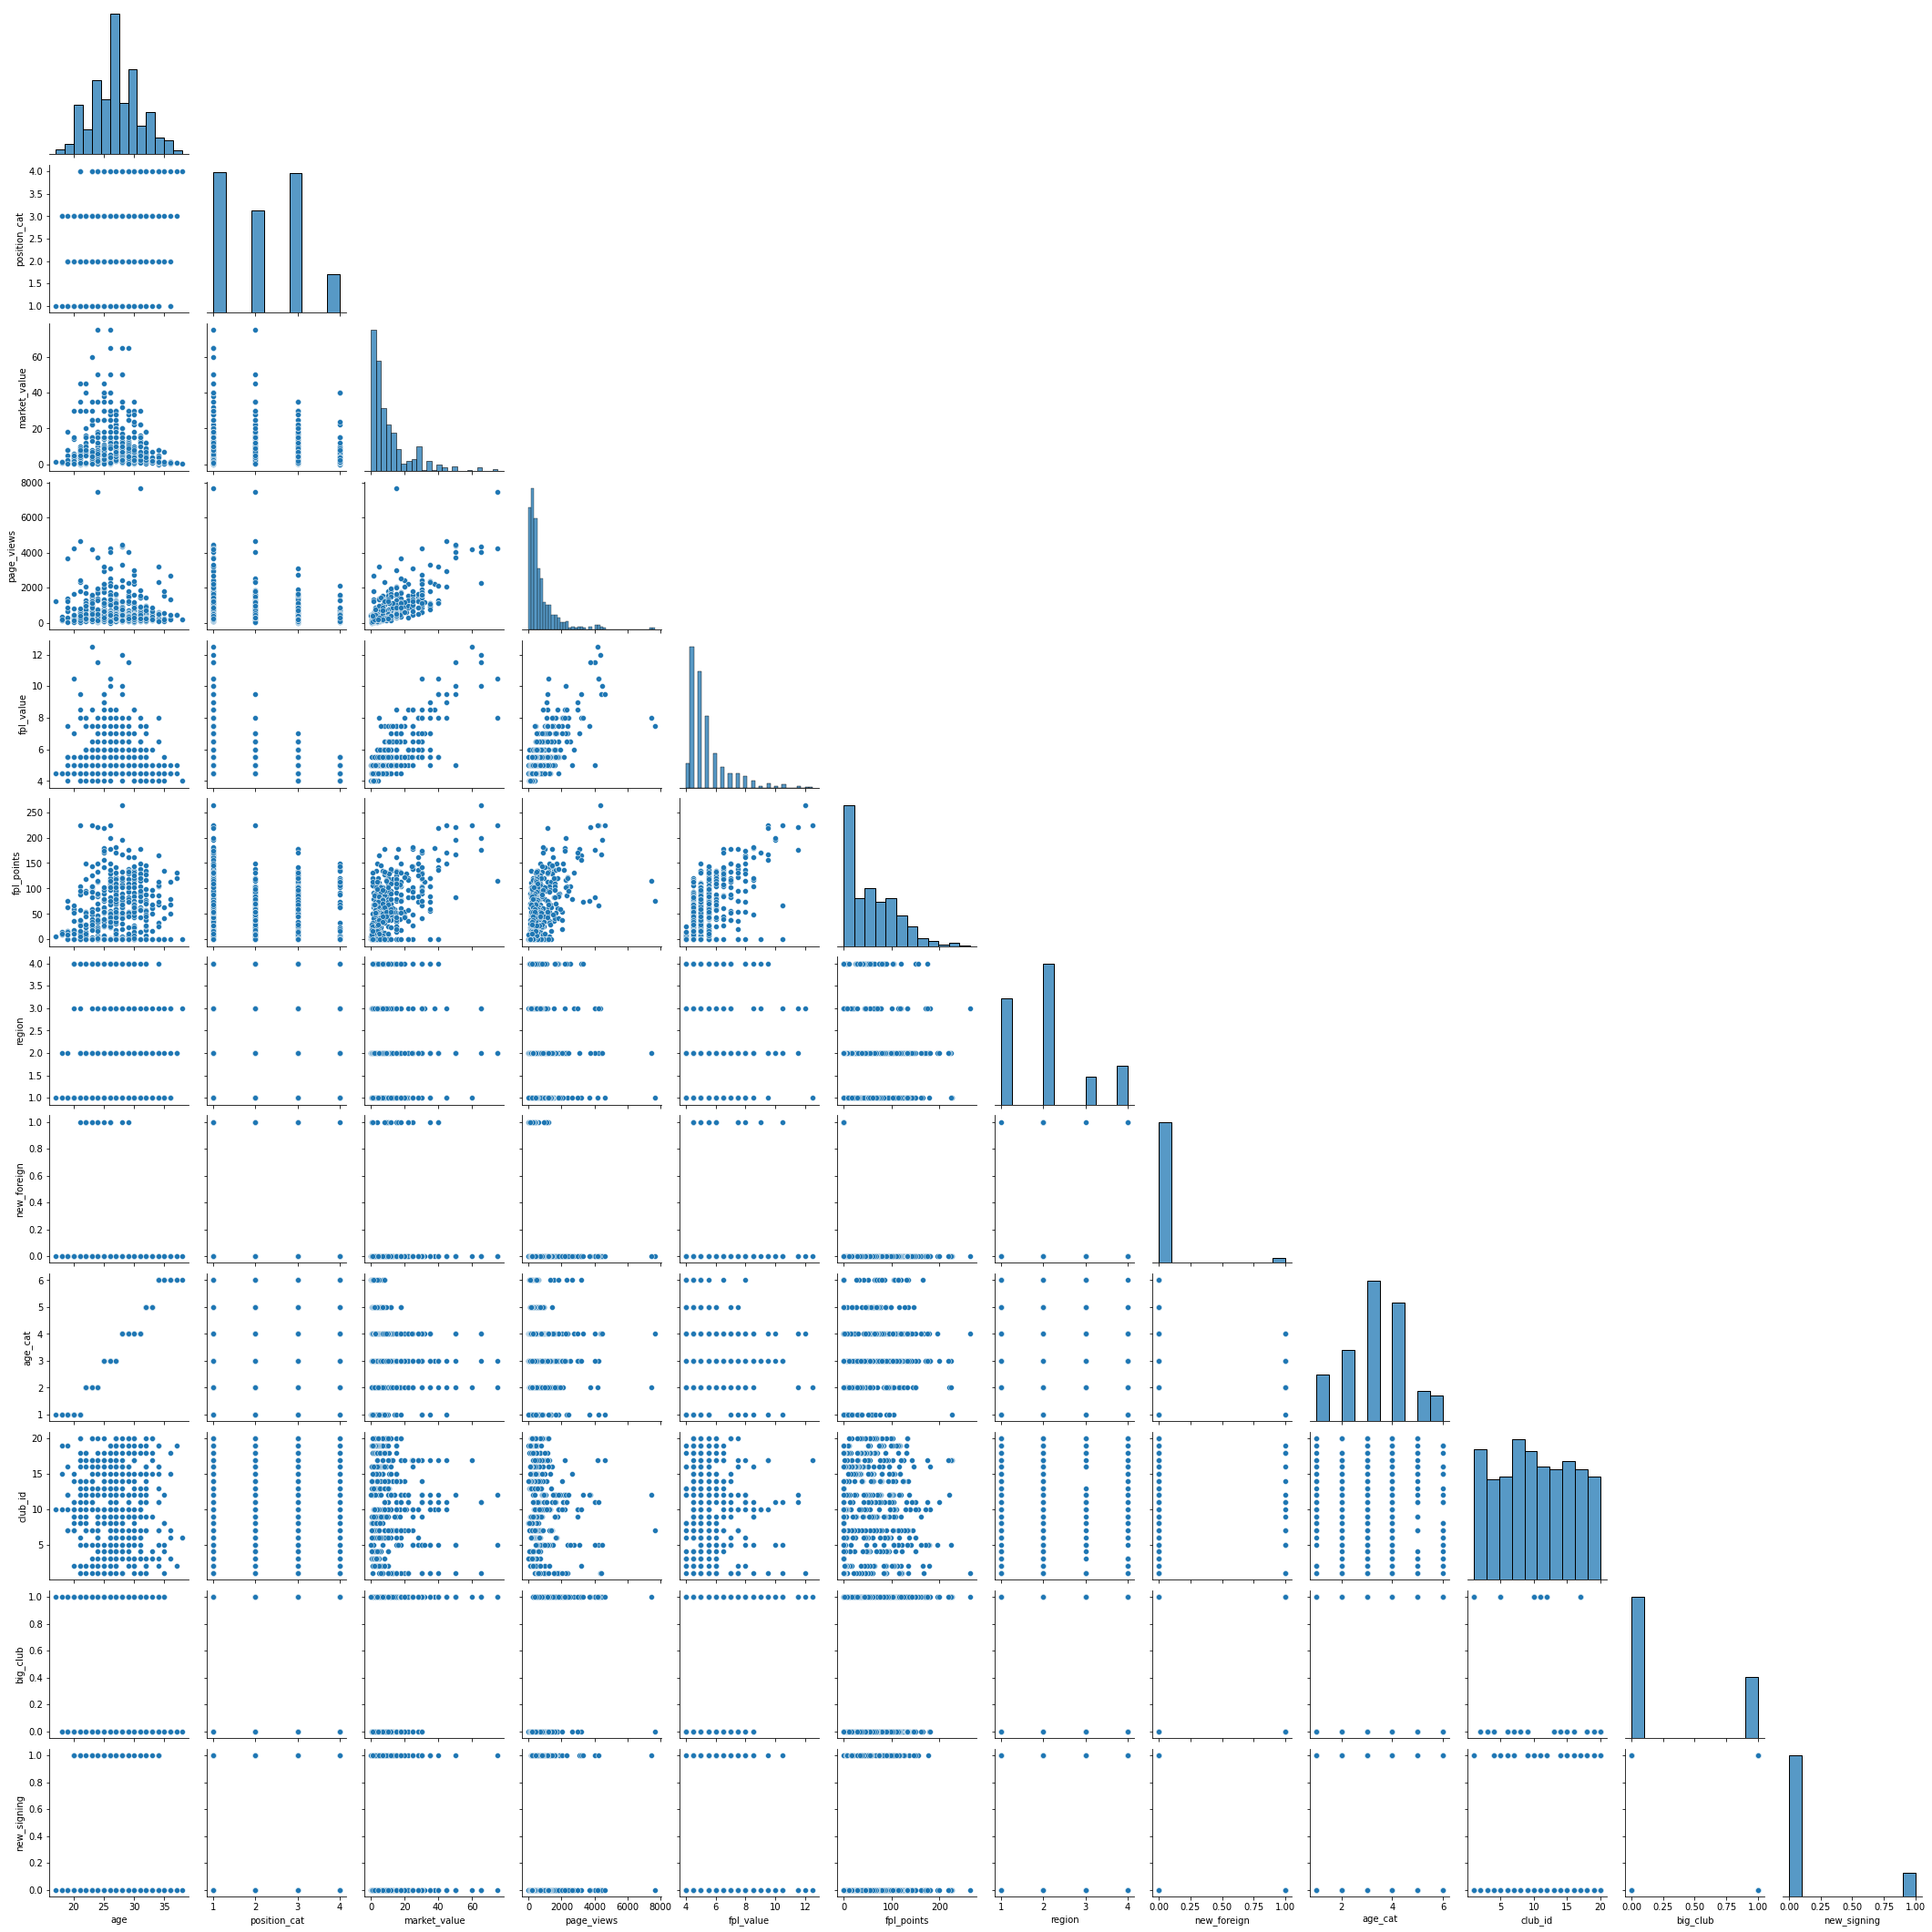

In [ ]:
import seaborn as sns

sns.pairplot(data,corner=True);

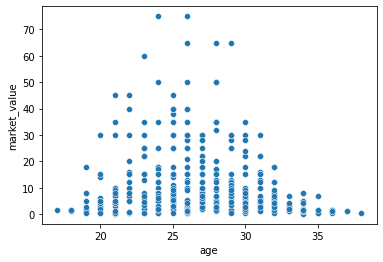

In [ ]:
#age/market_value
sns.scatterplot(data=data,x='age',y='market_value') 

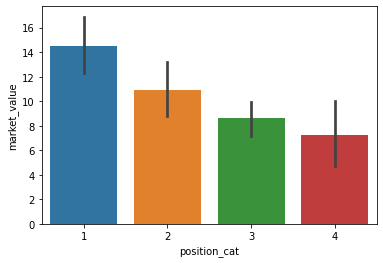

In [ ]:
#position_cat / market_value  
sns.barplot(data=data,x='position_cat',y='market_value')   

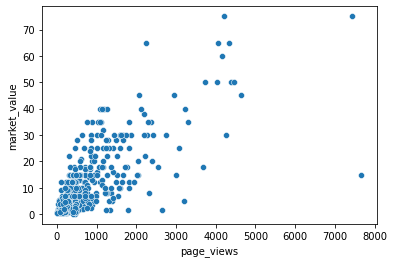

In [ ]:
#page_views / market_value
sns.scatterplot(data=data,x='page_views',y='market_value') 

In [ ]:
data.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085


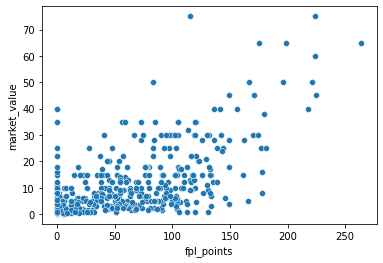

In [ ]:
#page_views / market_value
sns.scatterplot(data=data,x='fpl_points',y='market_value')  

In [ ]:
from matplotlib import pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sns.set(font_scale=1.5)
df_mini=data.loc[:,['club','position_cat','market_value']]
df_mini

,club,position_cat,market_value
0,Arsenal,1,65.0
1,Arsenal,1,50.0
2,Arsenal,4,7.0
3,Arsenal,1,20.0
4,Arsenal,3,22.0
...,...,...,...
456,West+Ham,2,5.0
457,West+Ham,3,7.0
458,West+Ham,3,4.5
459,West+Ham,1,1.0


In [ ]:
df_mini1=df_mini.groupby(['club','position_cat'])
df_mini2=df_mini1.mean()
df_mini2=df_mini2.reset_index()
df_mini2

,club,position_cat,market_value
0,Arsenal,1,29.6250
1,Arsenal,2,21.0000
2,Arsenal,3,15.1000
3,Arsenal,4,5.0000
4,Bournemouth,1,6.3500
...,...,...,...
75,West+Brom,4,2.7500
76,West+Ham,1,11.5000
77,West+Ham,2,8.2500
78,West+Ham,3,7.3125


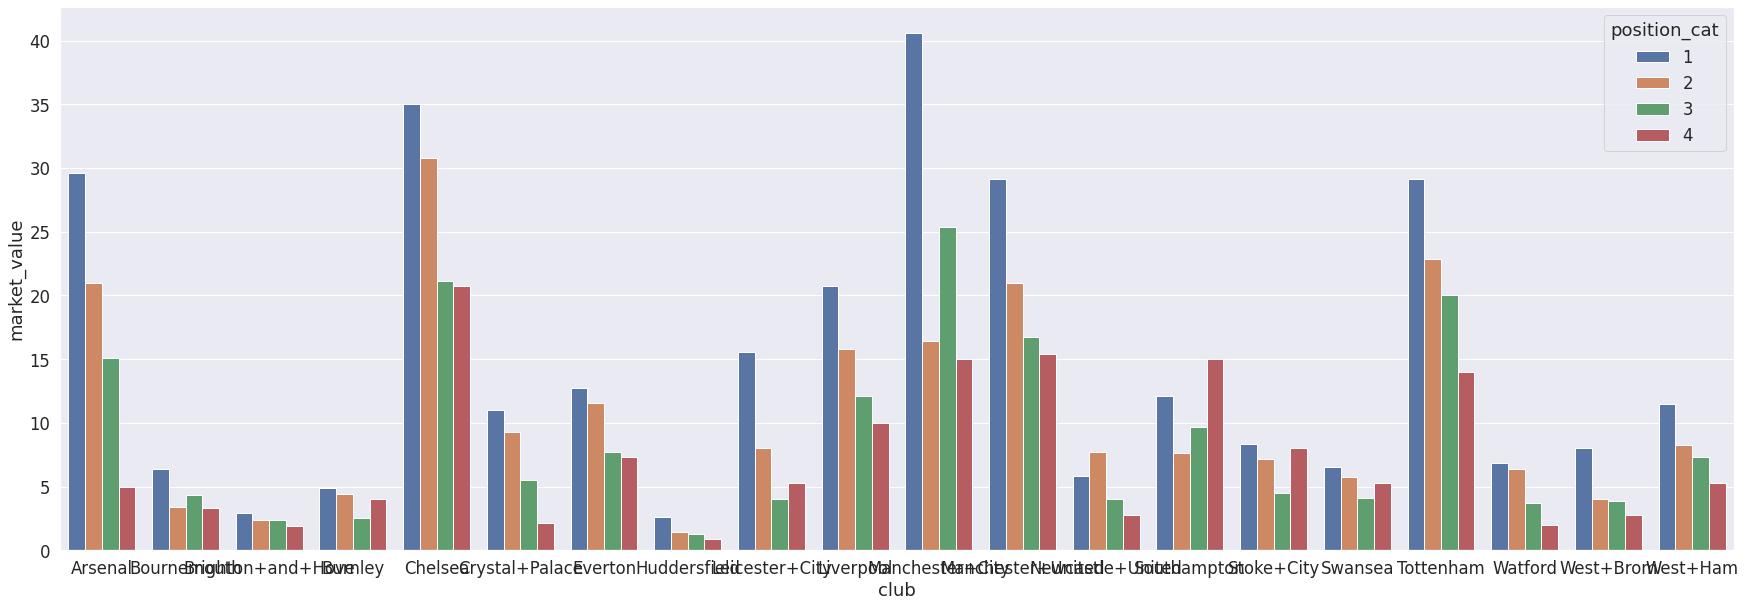

In [ ]:
#position_cat / market_value / club  
sns.barplot(data=df_mini2,x='club',y='market_value',hue='position_cat')   

In [ ]:
df_task1 = data.loc[:,['club','page_views']]
df_task1

,club,page_views
0,Arsenal,4329
1,Arsenal,4395
2,Arsenal,1529
3,Arsenal,2393
4,Arsenal,912
...,...,...
456,West+Ham,288
457,West+Ham,199
458,West+Ham,198
459,West+Ham,412


In [ ]:
grouped_df=df_task1.groupby('club')
grouped_mean=grouped_df.mean()
grouped_mean=grouped_mean.reset_index()
grouped_mean

,club,page_views
0,Arsenal,1402.785714
1,Bournemouth,508.458333
2,Brighton+and+Hove,198.272727
3,Burnley,287.833333
4,Chelsea,1773.800000
5,Crystal+Palace,455.428571
6,Everton,908.785714
7,Huddersfield,139.785714
8,Leicester+City,712.750000
9,Liverpool,1195.296296


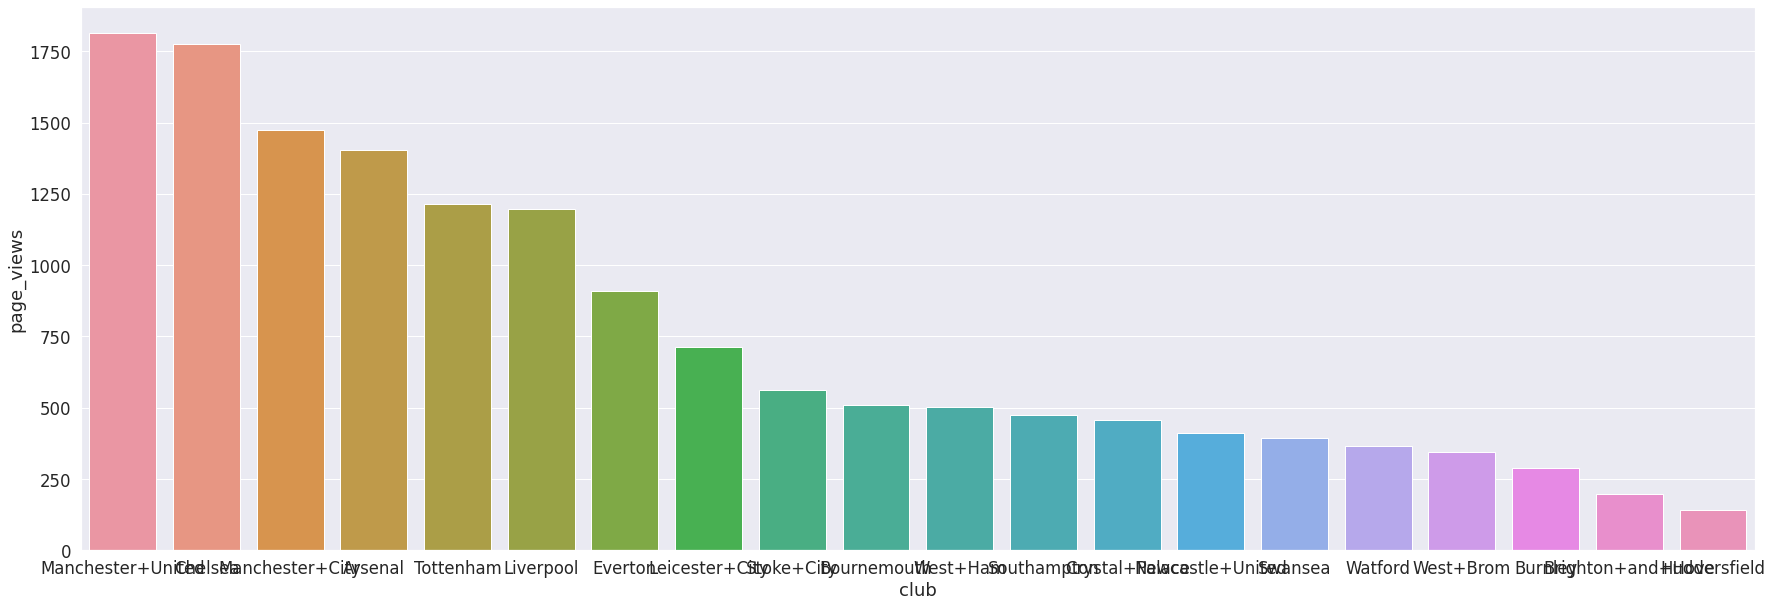

In [ ]:
grouped_mean.sort_values('page_views',axis=0,na_position='last',inplace=True,ascending=False)
sns.barplot(data=grouped_mean,x='club',y='page_views')

In [ ]:
df_task2=data.loc[:,['club','market_value']]
df_task2

,club,market_value
0,Arsenal,65.0
1,Arsenal,50.0
2,Arsenal,7.0
3,Arsenal,20.0
4,Arsenal,22.0
...,...,...
456,West+Ham,5.0
457,West+Ham,7.0
458,West+Ham,4.5
459,West+Ham,1.0


In [ ]:
df_grouped2=df_task2.groupby('club')
df_mean=df_grouped2.mean()
df_mean=df_mean.reset_index()
df_mean

,club,market_value
0,Arsenal,19.642857
1,Bournemouth,4.895833
2,Brighton+and+Hove,2.522727
3,Burnley,3.958333
4,Chelsea,27.677500
5,Crystal+Palace,7.726190
6,Everton,10.098214
7,Huddersfield,1.791071
8,Leicester+City,8.645833
9,Liverpool,16.314815


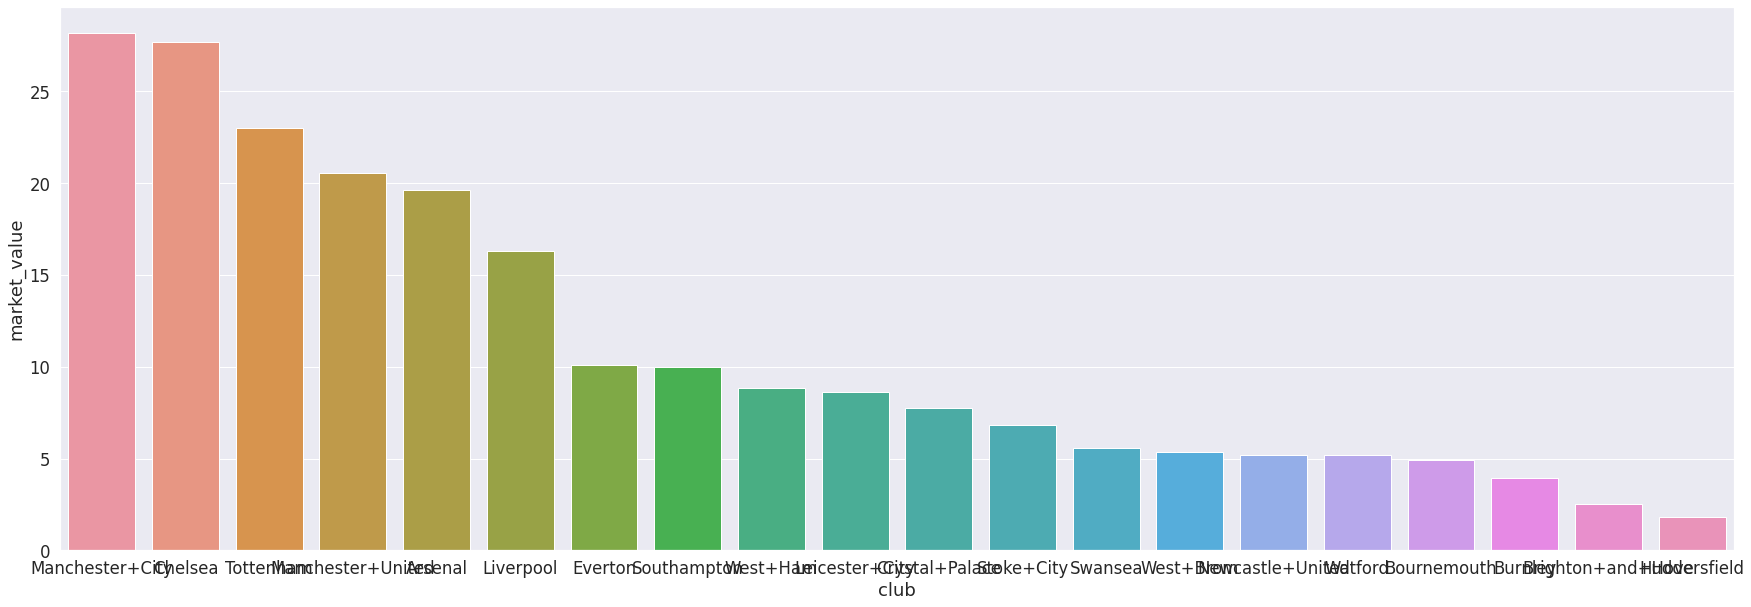

In [ ]:
df_mean.sort_values('market_value',axis=0,ascending=False,inplace=True,na_position='last')
sns.barplot(data=df_mean,x='club',y='market_value')

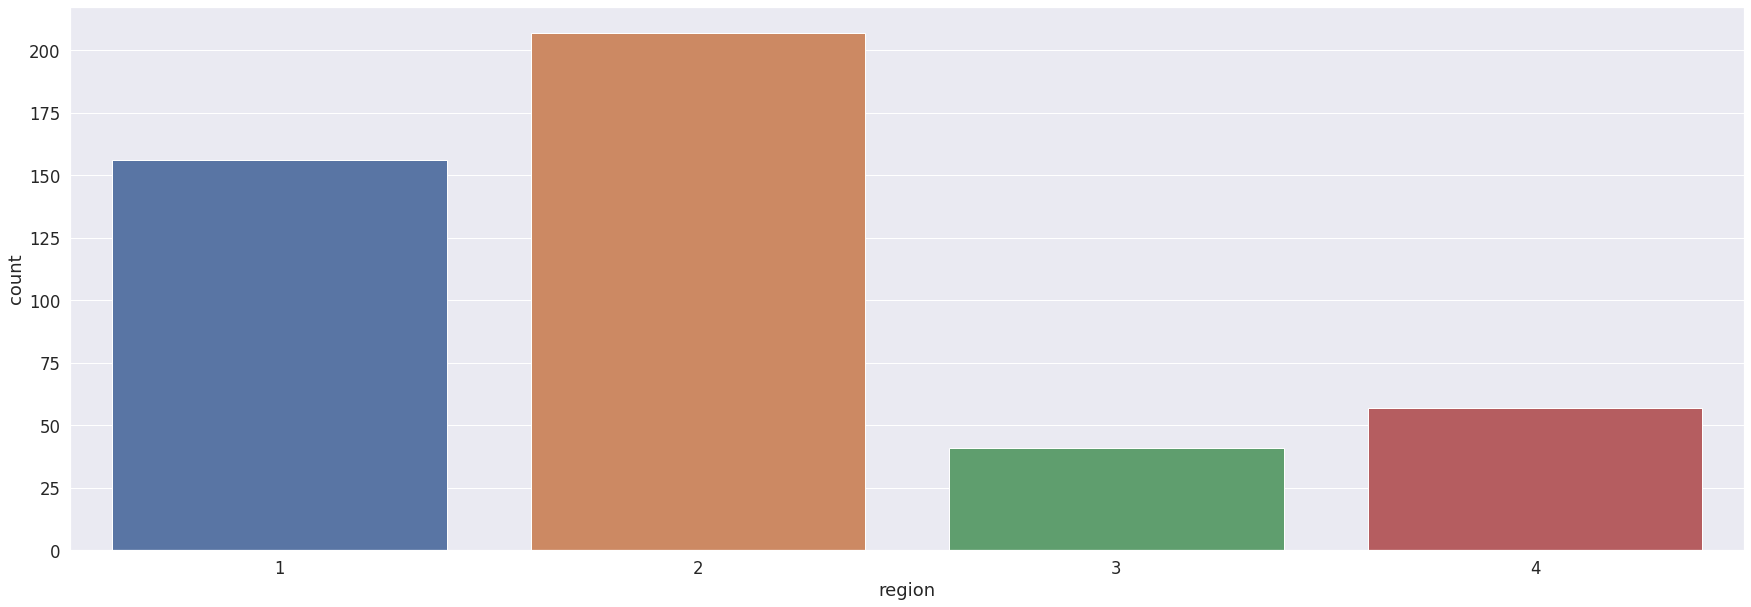

In [ ]:
sns.countplot(data=data,x='region')

In [ ]:
df_task4=data.loc[:,['region','market_value']]
df_task4

,region,market_value
0,3,65.0
1,2,50.0
2,2,7.0
3,1,20.0
4,2,22.0
...,...,...
456,2,5.0
457,4,7.0
458,1,4.5
459,1,1.0


In [ ]:
grouped_4 = df_task4.groupby('region')
mean_4 = grouped_4.mean()
mean_4 = mean_4.reset_index()
mean_4

,region,market_value
0,1,8.482372
1,2,12.208454
2,3,14.704878
3,4,10.934211


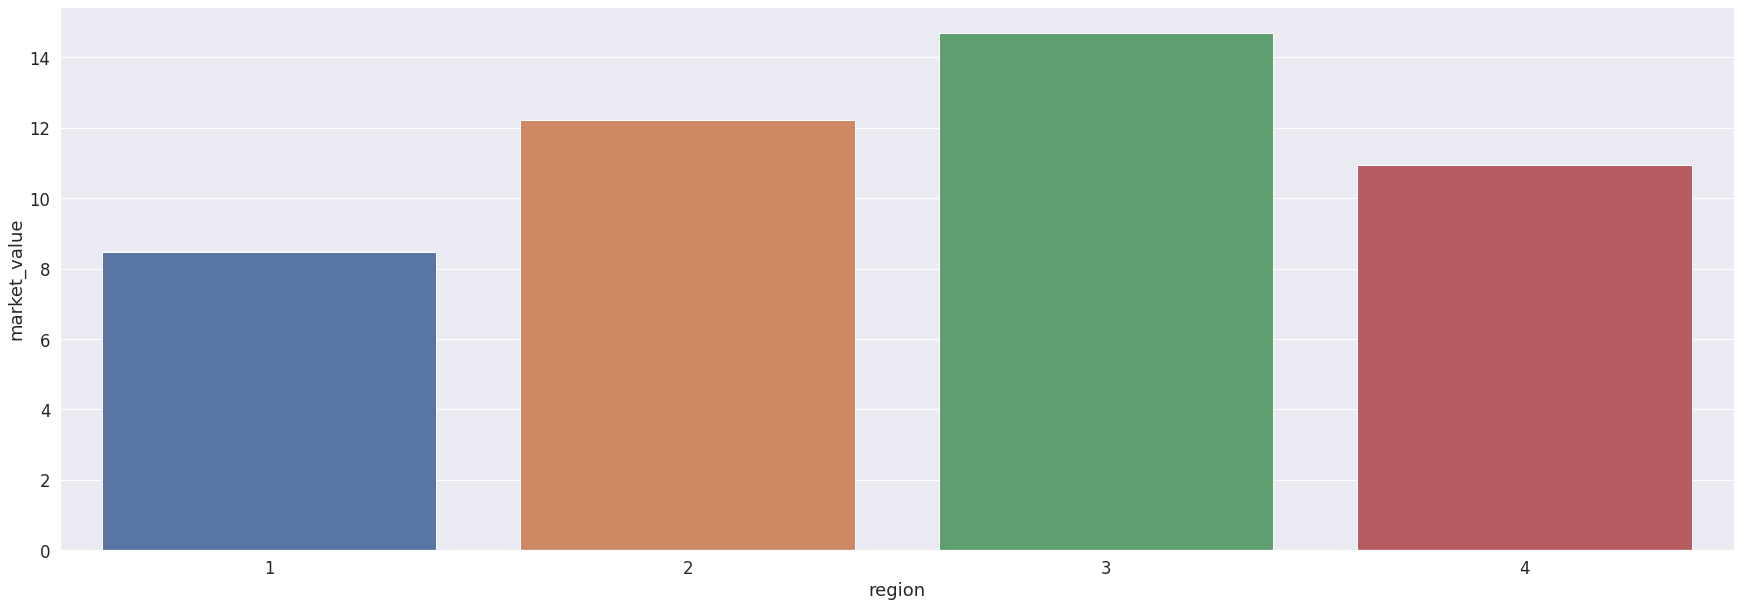

In [ ]:
sns.barplot(data=mean_4,x='region',y='market_value')

In [ ]:
# Changing the fpl_sel column from string object to float values
lstdf1=[]
lst_df=list(data['fpl_sel'])
for val in lst_df:
    x=val.split('%')
    lstdf1.append(x)
lstdf1

[['17.10', ''],
 ['5.60', ''],
 ['5.90', ''],
 ['1.50', ''],
 ['0.70', ''],
 ['13.70', ''],
 ['2.50', ''],
 ['4.70', ''],
 ['4.00', ''],
 ['1.00', ''],
 ['2.00', ''],
 ['1.80', ''],
 ['0.00', ''],
 ['5.10', ''],
 ['1.70', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['1.70', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['4.20', ''],
 ['0.20', ''],
 ['0.40', ''],
 ['1.00', ''],
 ['6.90', ''],
 ['26.50', ''],
 ['10.40', ''],
 ['15.00', ''],
 ['19.80', ''],
 ['6.90', ''],
 ['2.00', ''],
 ['0.60', ''],
 ['0.90', ''],
 ['1.60', ''],
 ['4.00', ''],
 ['0.70', ''],
 ['0.90', ''],
 ['0.10', ''],
 ['0.20', ''],
 ['11.50', ''],
 ['0.10', ''],
 ['1.10', ''],
 ['0.40', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['1.50', ''],
 ['0.10', ''],
 ['0.40', ''],
 ['3.30', ''],
 ['9.30', ''],
 ['2.10', ''],
 ['1.50', ''],
 ['4.10', ''],
 ['0.60', ''],
 ['8.00', ''],
 ['0.40', ''],
 ['0.20', ''],
 ['3.20', ''],
 ['0.80', ''],
 ['0.20', ''],
 ['4.80', ''],
 ['0.90', ''],
 ['0.30', ''],
 ['0.60', ''],
 ['

In [ ]:
lst_final=[]
for value in lstdf1:
    lst_final.append(float(value[0]))
lst_final

[17.1,
 5.6,
 5.9,
 1.5,
 0.7,
 13.7,
 2.5,
 4.7,
 4.0,
 1.0,
 2.0,
 1.8,
 0.0,
 5.1,
 1.7,
 0.1,
 0.5,
 0.1,
 0.5,
 1.7,
 0.8,
 0.1,
 4.2,
 0.2,
 0.4,
 1.0,
 6.9,
 26.5,
 10.4,
 15.0,
 19.8,
 6.9,
 2.0,
 0.6,
 0.9,
 1.6,
 4.0,
 0.7,
 0.9,
 0.1,
 0.2,
 11.5,
 0.1,
 1.1,
 0.4,
 0.8,
 0.1,
 1.5,
 0.1,
 0.4,
 3.3,
 9.3,
 2.1,
 1.5,
 4.1,
 0.6,
 8.0,
 0.4,
 0.2,
 3.2,
 0.8,
 0.2,
 4.8,
 0.9,
 0.3,
 0.6,
 0.2,
 0.1,
 0.2,
 0.1,
 0.3,
 1.3,
 0.4,
 0.2,
 13.5,
 2.9,
 1.7,
 13.7,
 2.5,
 1.2,
 1.2,
 0.2,
 0.1,
 0.2,
 0.0,
 0.5,
 0.1,
 0.4,
 0.1,
 0.1,
 1.7,
 0.4,
 2.3,
 3.0,
 12.0,
 12.4,
 12.3,
 7.8,
 18.5,
 20.3,
 7.5,
 9.0,
 0.2,
 5.0,
 13.8,
 0.2,
 1.6,
 0.8,
 0.1,
 0.1,
 6.4,
 1.6,
 20.9,
 10.5,
 2.7,
 4.2,
 10.9,
 2.1,
 1.2,
 1.4,
 0.6,
 2.0,
 1.1,
 0.6,
 0.3,
 0.3,
 0.2,
 0.1,
 0.0,
 0.1,
 0.0,
 16.4,
 2.0,
 0.7,
 10.0,
 0.4,
 4.7,
 3.2,
 13.1,
 6.3,
 14.6,
 0.4,
 1.3,
 20.9,
 0.1,
 0.3,
 1.7,
 1.0,
 2.9,
 0.2,
 0.9,
 0.4,
 0.1,
 0.2,
 0.3,
 0.3,
 1.7,
 0.2,
 0.2,
 3.6,
 2.1,
 2.4,
 0.5,

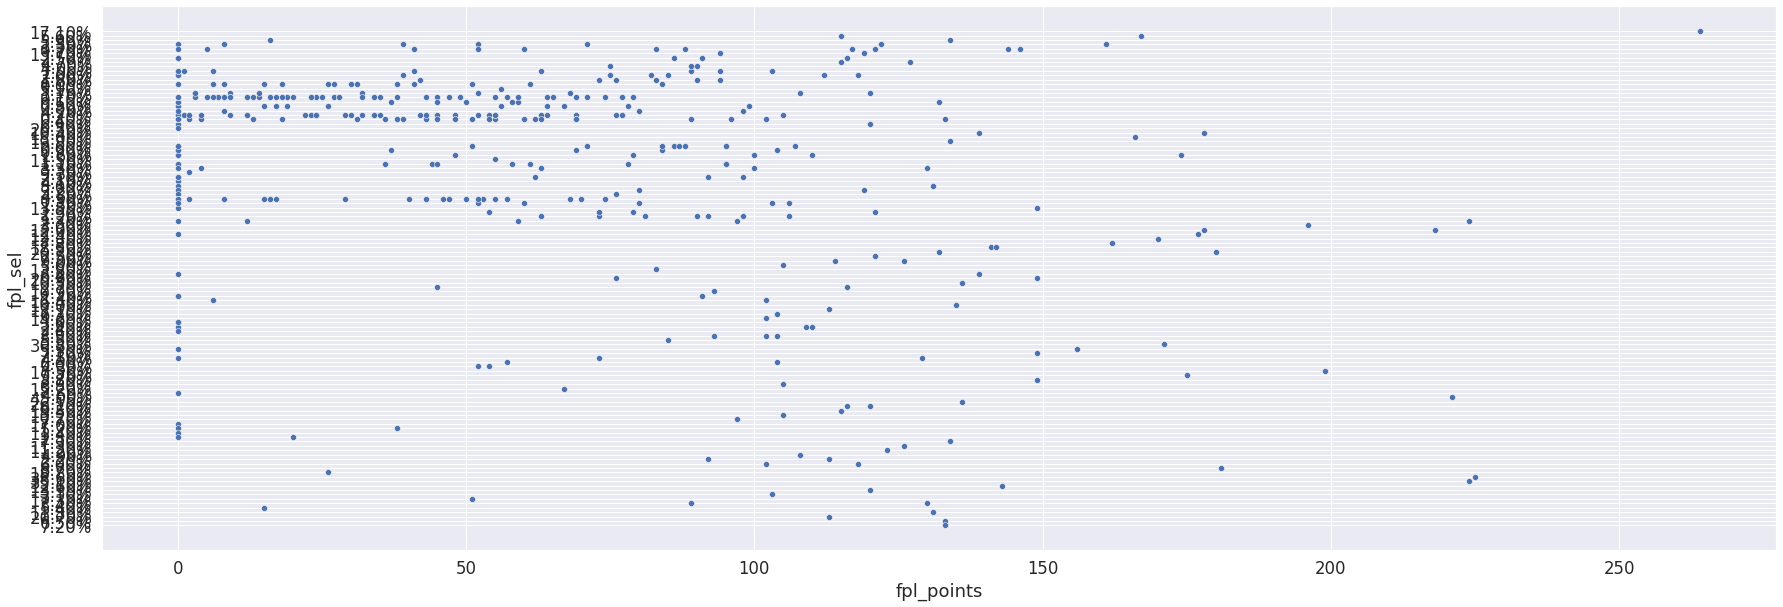

In [ ]:
sns.scatterplot(data=data,x='fpl_points',y='fpl_sel')

In [ ]:
data=data.drop(columns=['name', 'club', 'position', 'nationality', 'fpl_sel'])
data

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,264,3,0,4,1,1,0
1,28,1,50.0,4395,9.5,167,2,0,4,1,1,0
2,35,4,7.0,1529,5.5,134,2,0,6,1,1,0
3,28,1,20.0,2393,7.5,122,1,0,4,1,1,0
4,31,3,22.0,912,6.0,121,2,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
456,21,2,5.0,288,4.5,38,2,0,1,20,0,1
457,23,3,7.0,199,4.5,34,4,0,2,20,0,1
458,23,3,4.5,198,4.5,29,1,0,2,20,0,0
459,21,1,1.0,412,4.5,16,1,0,1,20,0,1


In [ ]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.997831,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.961202,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
data.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085


In [ ]:
X= data.drop('market_value',axis=1)
Y= data['market_value']

In [ ]:
from sklearn.model_selection  import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(345, 11)
(116, 11)
(345,)
(116,)


# Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(normalize=True)
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
from sklearn import metrics

pred = regressor.predict(X_test)
pred

array([ 1.81732636, 18.61361715,  7.58441575,  9.69559324, 13.48621875,
        1.7719928 ,  3.28553735,  1.44073652,  3.92641547,  7.25216353,
       -2.38453493, 10.1936729 , 18.45365622,  2.81978099, -0.54264911,
       23.63019   ,  3.86535783, 32.42850256, 26.01058233,  8.08985945,
       23.11992939, 18.37761402,  1.74913737,  1.19690072,  2.9482014 ,
       16.146341  , 37.18204607,  0.12339847,  4.76405672,  1.06228609,
        6.92144416, 13.68840757, -3.53960714, 44.8572245 , -2.62685466,
        6.83420694,  4.92959677,  6.52287303,  8.32396614,  9.11589334,
       12.93544942, 20.43070552,  8.38603154,  5.61373308,  2.4789383 ,
        4.28452146, 11.5166137 , 11.26726342,  3.66803695,  7.1254539 ,
        8.20933538,  6.05222621, 23.36013346,  5.70869415,  9.52959896,
        9.69304246,  7.6575665 ,  1.27702539,  6.6653578 ,  7.51223587,
       27.51176747,  8.18250124, 22.02182672,  2.98752722, 14.03228044,
        0.97935834, 52.53543893, 53.90963284,  1.8015113 , 12.61

In [ ]:
import numpy as np

rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

6.240155712201913

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1.0)
reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
pred = reg.predict(X_test)
pred

array([ 4.14462519e+00,  2.23715744e+01,  7.85834367e+00,  1.39892318e+01,
        1.01306000e+01,  3.66796278e+00,  4.04857119e+00,  4.81300409e+00,
        4.73405046e+00,  8.06735857e+00,  5.91849263e-01,  9.95177690e+00,
        1.86984249e+01,  4.45864248e+00, -1.17519141e+00,  1.89137094e+01,
        8.39429466e+00,  3.10701942e+01,  2.60437697e+01,  1.19126427e+01,
        1.91815825e+01,  1.62734074e+01,  5.41992427e+00,  6.52929025e-01,
        4.76061374e+00,  1.18505212e+01,  3.58555825e+01,  3.07511658e+00,
        7.15759296e+00,  3.10775032e+00,  8.16635672e+00,  9.61472424e+00,
       -1.67790930e+00,  4.12826322e+01, -4.06136940e-02,  1.04246265e+01,
        7.34082139e+00,  7.74529766e+00,  7.85357988e+00,  7.88467854e+00,
        1.48905838e+01,  1.76467710e+01,  2.08183378e+00,  6.96883179e+00,
        4.43041827e+00,  6.91941323e+00,  1.29294183e+01,  6.91115659e+00,
        4.35955701e+00,  7.60114230e+00,  5.75541303e+00,  6.42540411e+00,
        2.08845831e+01,  

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

7.698359940680875

# RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred= clf.predict(X_test)
pred

array([ 1.9055955 , 18.7251997 ,  7.52425174,  9.74829258, 13.46548675,
        1.81231209,  3.2821618 ,  1.47693104,  3.9364618 ,  7.30256158,
       -2.36530455, 10.16138604, 18.41717186,  2.88109445, -0.51252951,
       23.64683845,  3.83909701, 32.41844013, 25.98896816,  8.14432227,
       23.05405345, 18.31980441,  1.7404059 ,  1.24669998,  2.96449771,
       16.17420857, 37.0925475 ,  0.19306508,  4.7458718 ,  1.12961204,
        7.06387514, 13.69146098, -3.52365623, 44.8663453 , -2.60866187,
        6.85374881,  4.91991514,  6.57191437,  8.30277731,  9.12838724,
       12.8721744 , 20.35098392,  7.87450056,  5.58782627,  2.53195229,
        4.38545436, 11.42304779, 11.26048763,  3.65257016,  7.15091865,
        8.20254834,  6.06393814, 23.2689355 ,  5.76553013,  9.48785552,
        9.18979909,  7.66815299,  1.38226072,  6.7718437 ,  7.46611745,
       27.5075382 ,  8.20884694, 22.0729085 ,  3.07600387, 14.08444341,
        1.06539894, 52.67833612, 54.03509227,  1.88605392, 12.55

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

6.235107129412207

# NEAREST NEIGHBOUR REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
pred= neigh.predict(X_test)
pred

array([ 2.7 , 24.4 , 12.  , 13.3 ,  5.5 ,  4.85,  3.9 ,  2.5 ,  3.  ,
        4.8 ,  6.  ,  5.6 , 23.  ,  4.9 ,  1.45, 23.  ,  7.2 , 28.6 ,
       33.6 , 10.7 , 20.2 , 22.  ,  4.4 ,  0.7 ,  3.4 ,  6.3 , 26.  ,
        2.15,  7.3 ,  6.4 ,  7.1 ,  8.5 ,  1.8 , 23.6 ,  2.4 , 11.4 ,
        7.6 , 10.  ,  4.  ,  6.1 , 14.4 , 23.  ,  1.8 ,  9.2 ,  4.  ,
        5.7 , 22.4 ,  8.7 ,  8.7 ,  5.4 ,  5.7 ,  5.3 , 18.8 ,  8.  ,
       18.2 ,  0.7 ,  8.6 ,  1.45,  5.1 , 14.  , 23.  ,  8.5 , 20.1 ,
        7.3 , 13.3 ,  0.7 , 56.  , 47.6 ,  5.62, 17.2 , 20.2 ,  4.9 ,
       27.  ,  1.75,  2.25,  4.5 , 12.  ,  8.  ,  5.2 ,  5.5 , 20.2 ,
       11.6 ,  4.8 , 22.  ,  1.1 ,  2.35, 24.6 ,  9.3 ,  8.5 , 11.8 ,
       20.1 ,  3.9 ,  1.65,  6.2 , 22.2 ,  7.5 ,  3.35,  9.6 ,  6.4 ,
        8.4 , 15.4 , 19.4 ,  8.6 , 15.8 ,  9.4 ,  6.9 ,  4.9 ,  5.9 ,
       24.2 ,  3.35, 57.  ,  6.81,  8.5 , 14.1 , 19.8 ,  9.2 ])

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

8.049488900031115

# SUPPORT VECTOR REGRESSOR

In [ ]:
from sklearn.svm import SVR

sregressor = SVR(kernel = 'rbf')
sregressor.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
pred= sregressor.predict(X_test)
pred

array([ 2.96963497, 21.7640293 ,  7.5062868 , 19.51492627,  9.98700483,
        3.55937126,  3.55587054,  2.78309501,  3.38636974,  4.11444557,
        3.88629954,  5.41707061, 21.87749007,  3.45303348,  2.55690782,
       17.48009024,  6.53435209, 21.83832785, 21.23189739,  8.910705  ,
       19.29078415, 21.33945654,  3.13154608,  2.45580491,  3.52225566,
       10.06889481, 20.07074848,  2.64719902,  4.35316813,  3.86520705,
        8.17520901,  7.77989693,  2.37325781, 20.33031611,  3.00089373,
       10.99139732,  6.50741325,  5.69946745,  3.30850382,  4.99000693,
       10.90183763, 21.34328993,  2.39853031,  6.83689273,  3.30150552,
        3.53157174, 21.8613022 ,  4.78427825,  4.71664908,  4.89664097,
        8.10296434,  4.22026364, 22.00463168, 11.77599263, 14.45341125,
        2.44562401, 10.26533619,  2.20085253,  3.63947621,  8.73328852,
       20.9631481 ,  5.07856939, 20.65487055,  4.8641812 , 19.90573387,
        2.44958417, 23.39487858, 22.2072626 ,  5.66924157, 18.54

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

8.810676809761732

# TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tregressor = DecisionTreeRegressor(random_state=0)
tregressor.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
pred= tregressor.predict(X_test)
pred

array([ 0.25, 12.  ,  1.  , 15.  , 10.  ,  0.75,  2.5 ,  0.25,  4.  ,
        5.  ,  6.  ,  8.  , 12.  ,  2.  ,  0.5 , 20.  ,  6.  , 20.  ,
       18.  , 10.  , 28.  , 12.  ,  2.5 ,  5.  ,  7.  , 10.  , 28.  ,
        2.  ,  2.5 ,  5.  ,  5.  , 21.  ,  0.5 , 45.  ,  0.5 , 13.  ,
        5.  ,  9.  ,  3.  ,  7.  , 15.  ,  1.5 ,  5.  ,  1.  ,  5.5 ,
        0.75,  2.5 , 10.  ,  5.  , 15.  ,  5.  ,  2.5 , 35.  ,  4.  ,
        6.  ,  5.5 , 10.  ,  0.25,  6.  ,  1.  , 32.  ,  5.  , 18.  ,
        3.  , 12.  ,  0.5 , 65.  , 65.  ,  5.  ,  3.5 , 28.  ,  1.  ,
       35.  ,  4.  ,  3.  ,  1.5 , 13.  ,  1.  ,  2.  , 10.  , 30.  ,
       18.  ,  2.5 ,  8.  ,  0.25,  5.  , 40.  , 20.  ,  5.  , 10.  ,
       15.  ,  1.  ,  0.25,  6.  , 16.  , 10.  ,  1.5 , 22.  ,  9.  ,
        8.  , 15.  ,  4.  ,  5.  , 35.  , 15.  ,  3.5 , 10.  ,  6.  ,
       16.  ,  6.  , 12.  ,  6.  ,  3.5 , 15.  , 12.  , 20.  ])

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

6.576350326791423

# RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rRegressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rRegressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred = rRegressor.predict(X_test)
pred

array([ 1.57  , 16.02  ,  3.286 , 13.66  ,  8.77  ,  2.067 ,  3.81  ,
        1.72  ,  4.365 ,  6.655 ,  3.1445,  8.515 , 25.35  ,  4.995 ,
        1.945 , 17.74  ,  6.0655, 26.74  , 22.72  ,  8.315 , 29.63  ,
       19.545 ,  3.8375,  2.0325,  4.445 , 12.35  , 27.76  ,  2.69  ,
        4.955 ,  4.7   ,  8.435 , 11.525 ,  0.6475, 39.6   ,  1.87  ,
       11.91  ,  4.625 ,  8.29  ,  5.265 ,  8.495 , 12.025 , 15.23  ,
        3.1505,  4.178 ,  4.3075,  4.6325,  7.105 ,  5.148 ,  5.564 ,
        8.04  ,  7.325 ,  5.5125, 28.26  ,  9.425 , 11.245 ,  3.299 ,
       10.78  ,  0.5665,  6.045 ,  6.201 , 22.95  ,  6.178 , 16.38  ,
        5.6055, 16.29  ,  0.719 , 53.37  , 56.1   ,  5.835 ,  9.02  ,
       25.04  ,  2.903 , 21.78  ,  3.04  ,  2.6875,  2.645 , 13.975 ,
        5.501 ,  3.3945,  8.505 , 26.17  , 15.665 ,  3.545 , 22.51  ,
        0.9875,  3.75  , 31.99  , 12.005 ,  5.425 , 13.17  , 19.365 ,
        1.6825,  1.5635,  5.136 , 19.85  ,  9.575 ,  3.4775, 14.2   ,
        6.62  ,  9.9

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

5.58683093946118

# GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regb = GradientBoostingRegressor(random_state=0)
regb.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred= regb.predict(X_test)
pred

array([ 0.67617833, 16.47352984,  1.30906136, 13.86641975,  6.01966199,
        0.93639296,  2.52795461,  0.95941827,  2.87475374,  8.69350565,
       -0.73711245,  8.39095638, 22.34147773,  5.81238726, -0.77398466,
       19.51628488,  4.99258522, 33.06469323, 20.72754784,  6.01147257,
       27.91281851, 20.03885602,  1.89781703,  1.72793831,  6.97336257,
       14.77917835, 34.07335147,  2.0017422 ,  5.77860482,  2.22773625,
       11.37361999, 15.90740057, -1.00843959, 42.82216103, -0.73579116,
       10.37500868,  4.34994502,  9.17251473,  7.62487799,  9.51498788,
       12.18510238, 12.01956408,  3.61837277,  0.83427574,  4.57467474,
        4.0936756 ,  5.207028  ,  2.97561669,  4.10358417,  8.05389608,
        9.46817321,  5.03702141, 32.21574648,  6.6053403 , 11.45594804,
        3.50579715,  8.95937081, -0.92770727,  7.06558738,  2.38993778,
       21.4012838 ,  7.32986782, 18.76389978,  4.2749438 , 12.69215419,
       -0.77878838, 45.82756858, 59.40736918,  5.46581234,  6.70

In [ ]:
rMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
rMSE

5.244900317284406